In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [ ]:
df = pd.read_csv('scraped_data.csv')
df = df.loc[df['brand_1'] != df['brand_2']]
df.shape

(15799, 9)

In [ ]:
df.head()
df.sort_values(by=['text_short'], ascending=False).head(5)

,product_1,product_2,brand_1,brand_2,text_short,text_long,image,product_1_url,product_2_url
8215,B0CS6D4BZ1,B0CN38Z8WP,Outdoor porch use with WIFI2,cameras,0.988411,0.933695,0.913518,https://www.amazon.com/Security-Camera-Panoram...,https://www.amazon.com/Security-Rotation-Icam3...
11682,B0CQYQCJ4G,B0CL3XXB31,GBIUT,WESECUU,0.781773,0.297649,0.774734,https://www.amazon.com/sspa/click?ie=UTF8&spc=...,https://www.amazon.com/WESECUU-Security-Camera...
12243,B0CFXY32Y1,B0CQYQCJ4G,WESECUU,GBIUT,0.768335,0.260614,0.815840,https://www.amazon.com/WESECUU-Security-Wirele...,https://www.amazon.com/sspa/click?ie=UTF8&spc=...
12195,B0CFXY32Y1,B0CMCWYDZK,WESECUU,Noahcam,0.767033,0.258849,0.778696,https://www.amazon.com/WESECUU-Security-Wirele...,https://www.amazon.com/Security-Cameras-Wirele...
5514,B0CMCWYDZK,B0CL3XXB31,Noahcam,WESECUU,0.760786,0.160893,0.742072,https://www.amazon.com/Security-Cameras-Wirele...,https://www.amazon.com/WESECUU-Security-Camera...


In [ ]:
df.iloc[11733]

product_1                                               B0C1NX9H4X
product_2                                               B0CJ4NB9T9
brand_1                                                    litokam
brand_2                                                    NEWcama
text_short                                                0.236882
text_long                                                 0.104916
image                                                     0.682577
product_1_url    https://www.amazon.com/Indoor-Cameras-Security...
product_2_url    https://www.amazon.com/NEWcama-Security-high-D...
Name: 11813, dtype: object

<Axes: >

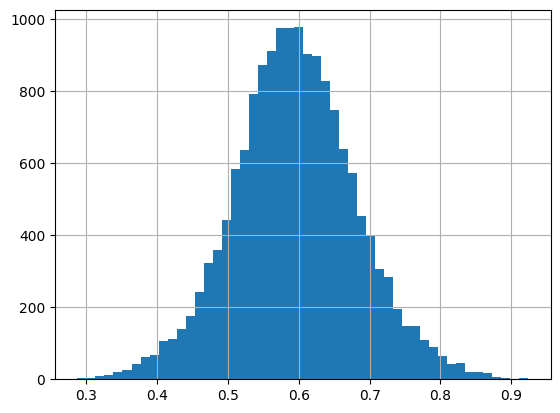

In [ ]:
df['image'].hist(bins=50)

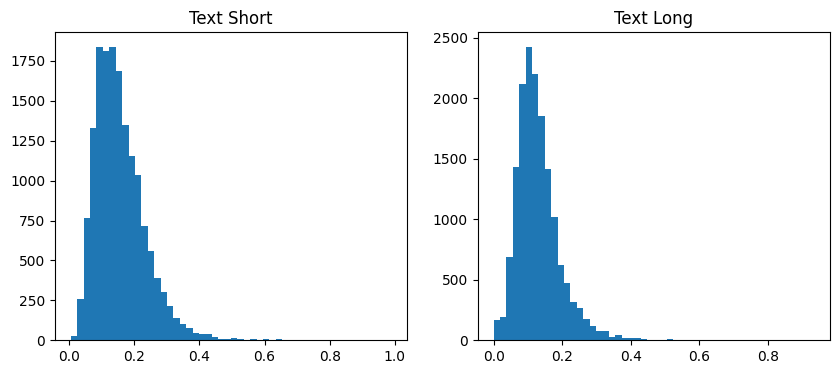

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(10, 4))  # 1 row, 2 columns

# Plot for 'text_short'
axes[0].hist(df['text_short'], bins=50)
axes[0].set_title('Text Short')

# Plot for 'text_long'
axes[1].hist(df['text_long'], bins=50)
axes[1].set_title('Text Long')

plt.show()

In [ ]:
# inorder to set values for the threshold we see the distribution of these values

In [ ]:
long_text_bins = pd.cut(df['text_long'], bins=10)
short_text_bins = pd.cut(df['text_short'], bins=10)
image_bins = pd.cut(df['image'], bins=10)

In [ ]:
print(long_text_bins.value_counts())
# print(short_text_bins.value_counts())
print(image_bins.value_counts())

text_long
(0.0934, 0.187]        8908
(-0.000934, 0.0934]    4601
(0.187, 0.28]          1852
(0.28, 0.373]           346
(0.373, 0.467]           64
(0.467, 0.56]            25
(0.56, 0.654]             1
(0.654, 0.747]            1
(0.84, 0.934]             1
(0.747, 0.84]             0
Name: count, dtype: int64
image
(0.542, 0.606]    4710
(0.606, 0.669]    4013
(0.478, 0.542]    2811
(0.669, 0.733]    2013
(0.415, 0.478]     993
(0.733, 0.797]     689
(0.351, 0.415]     304
(0.797, 0.861]     193
(0.287, 0.351]      45
(0.861, 0.924]      28
Name: count, dtype: int64


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_heat_map(pair_wise_percents, title, x_label, y_label):
    x_values = sorted(set(key[0] for key in pair_wise_percents.keys()), reverse=True)
    y_values = sorted(set(key[1] for key in pair_wise_percents.keys()), reverse=True)
    rows = len(y_values)
    cols = len(x_values)

    grid = [[None] * cols for _ in range(rows)]

    for key, value in pair_wise_percents.items():
        x_index = x_values.index(key[0])
        y_index = y_values.index(key[1])
        grid[y_index][x_index] = value

    plt.imshow(grid, cmap='viridis', interpolation='nearest')
    plt.colorbar(label='Values')
    plt.xticks(np.arange(cols), x_values)
    plt.yticks(np.arange(rows), y_values)

    for i in range(rows):
        for j in range(cols):
            plt.text(j, i, f'{grid[i][j]*100:.2f}', ha='center', va='center', color='white')

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [ ]:
img_thresholds = [0.9, 0.8, 0.7, 0.6, 0.5, 0.4]
txt_thresholds = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]

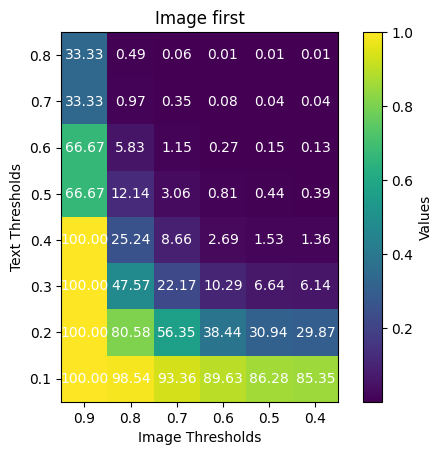

In [ ]:
# Image first
img_first_pair_wise_percents = {}

for img_thres in img_thresholds:
    for txt_thres in txt_thresholds:
        img_cnt  = df.loc[df['image'] >= img_thres].shape[0]
        new_df = df.loc[df['image'] >= img_thres]
        txt_cnt  = new_df.loc[(new_df['text_long'] >= txt_thres) | (new_df['text_short'] >= txt_thres)].shape[0]
        # print(img_thres, txt_thres)
        img_first_pair_wise_percents[(img_thres, txt_thres)] = txt_cnt / img_cnt

plot_heat_map(img_first_pair_wise_percents, "Image first", x_label='Image Thresholds', y_label='Text Thresholds')
# img_first_pair_wise_percents

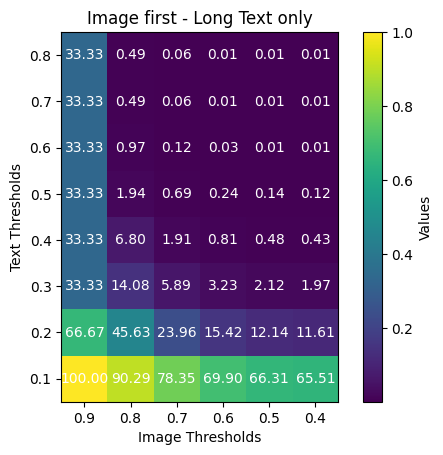

In [ ]:
# Image first
img_first_pair_wise_percents_lt = {}

for img_thres in img_thresholds:
    for txt_thres in txt_thresholds:
        img_cnt  = df.loc[df['image'] >= img_thres].shape[0]
        new_df = df.loc[df['image'] >= img_thres]
        txt_cnt  = new_df.loc[new_df['text_long'] >= txt_thres].shape[0]
        # print(img_thres, txt_thres)
        img_first_pair_wise_percents_lt[(img_thres, txt_thres)] = txt_cnt / img_cnt

plot_heat_map(img_first_pair_wise_percents_lt, "Image first - Long Text only", x_label='Image Thresholds', y_label='Text Thresholds')

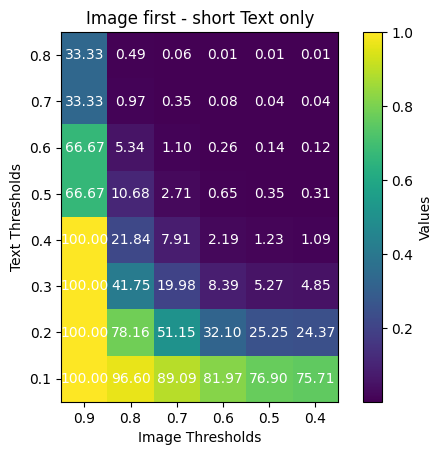

In [ ]:
img_first_pair_wise_percents_st = {}

for img_thres in img_thresholds:
    for txt_thres in txt_thresholds:
        img_cnt  = df.loc[df['image'] >= img_thres].shape[0]
        new_df = df.loc[df['image'] >= img_thres]
        txt_cnt  = new_df.loc[new_df['text_short'] >= txt_thres].shape[0]
        # print(img_thres, txt_thres)
        img_first_pair_wise_percents_st[(img_thres, txt_thres)] = txt_cnt / img_cnt

plot_heat_map(img_first_pair_wise_percents_st, "Image first - short Text only", x_label='Image Thresholds', y_label='Text Thresholds')
# img_first_pair_wise_percents

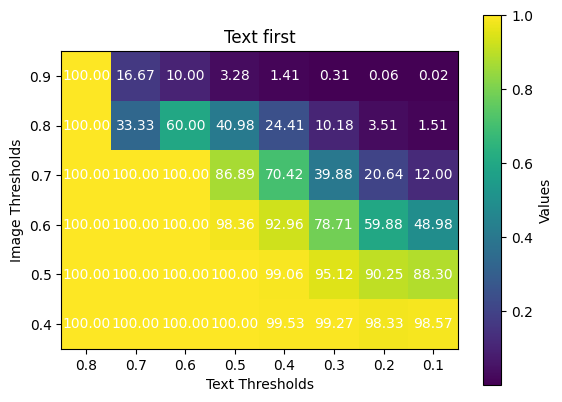

In [ ]:
txt_first_pair_wise_percents = {}

for txt_thres in txt_thresholds:
    for img_thres in img_thresholds:
        txt_cnt  = df.loc[(df['text_long'] >= txt_thres) | (df['text_short'] >= txt_thres)].shape[0]
        new_df = df.loc[(df['text_long'] >= txt_thres) | (df['text_short'] >= txt_thres)]
        img_cnt  = new_df.loc[(new_df['image'] >= img_thres)].shape[0]
        txt_first_pair_wise_percents[(txt_thres, img_thres)] = img_cnt/txt_cnt

plot_heat_map(txt_first_pair_wise_percents, "Text first", x_label='Text Thresholds', y_label='Image Thresholds')

In [ ]:
# Why is there an inconsistency?
img_exp_df = df.loc[df['image'] > 0.7]
txt_exp_df = img_exp_df.loc[(img_exp_df['text_long'] >= 0.5) | (img_exp_df['text_short'] >= 0.5)]
txt_exp_df.shape

(53, 9)

In [ ]:
txt_exp_df.loc[3279].product_1_url

'https://www.amazon.com/Noahcam-Security-Cameras-Wireless-Lightbulb/dp/B0CM8WPS13/ref=sr_1_64?dib=eyJ2IjoiMSJ9.fk3kix_Q0Xlpp7LMkXcBMrVGXdcg1bxMG8MNGlALtrmF7OrV_cAOFMzfrBdyD_c1T-UpF7k4j6NZE07jbcNXA_CEpTPxrICyB-GMnkeK8FUubo7uPgfN6GB6zrWRdSpHJOy0IOSERssHa-cQ5zKvub44uhABwjCeTWHoFStedSlLLufyxCCKB-IRPhlkqIloQaAtsu69ZRShjTAVuIGCcqvLqAUfkGvpgd2YH9lZ5cY.6WjEWuOYREZd4qE3MF1NHyoPq43oAgAp92D6BRkXVZQ&dib_tag=se&keywords=smart+camera&qid=1708821759&sr=8-64'

# Text first analysis

In [ ]:
txt_first = df.loc[(df['text_long'] >= 0.6) | (df['text_short'] >= 0.6)]
final_df = txt_first.loc[txt_first['image'] >= 0.8]
final_df.shape

(12, 9)

In [ ]:
final_df.head(53)
final_df.to_csv('text_first.csv', index=False)